# Linear regression: Boston Dataset

## Dataset overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Begin by deleting the dataset
path_to_data = "../../datasets/kaggle/boston_housing.csv"
raw_df = pd.read_csv(path_to_data)
raw_df.drop('Unnamed: 0', axis=1, inplace=True)
raw_df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
raw_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Preprocessing 
### Check and remove null values


<AxesSubplot:>

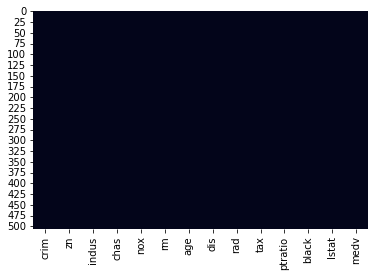

In [5]:
# So it looks like there are no empty values
sns.heatmap(raw_df.isnull(), cbar=False)

## Exploratory Data Analysis
### Lets look for some outliers

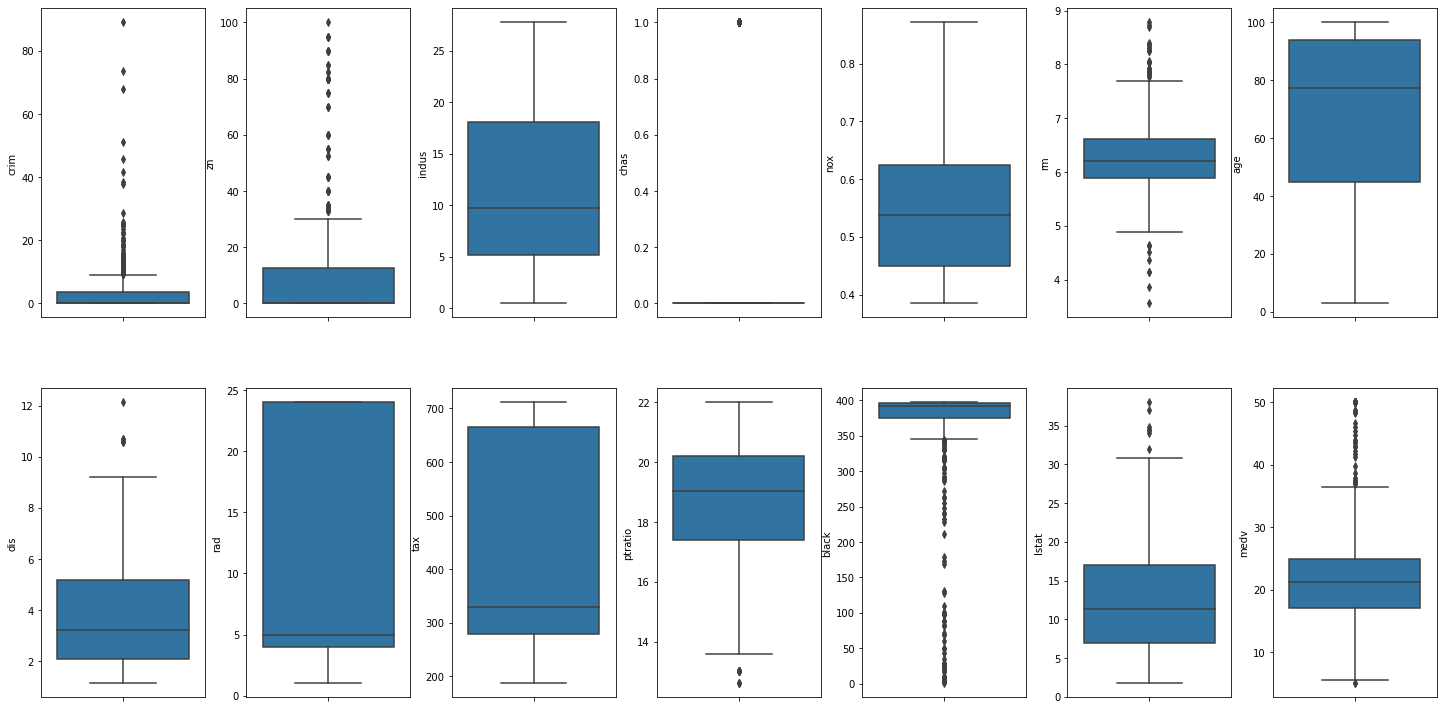

In [6]:
def create_box_plots(df):
    fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(20,10))
    ax =ax.flatten()
    index = 0
    fig.tight_layout(pad=0.5,w_pad=0.7, h_pad=5.0)
    for col, value in df.items():
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
    
# If you have many outliers, it will affect the uniform distribution: You can use min-max normalization or other tecniques
# In an extreme way you can drop the columns with too many outliers
create_box_plots(raw_df)

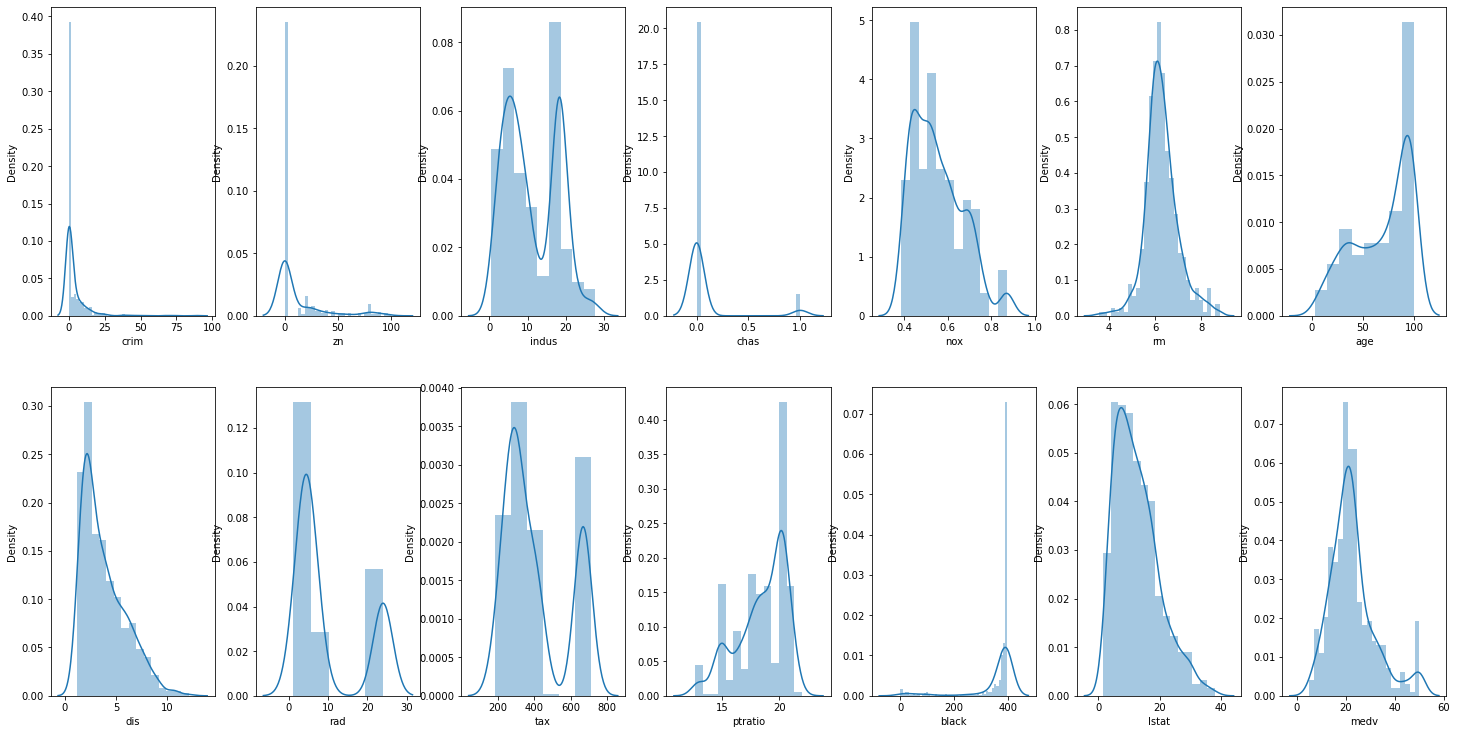

In [7]:
# Distribution plots
def create_dist_plots(df):
    fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(20,10))
    ax =ax.flatten()
    index = 0
    fig.tight_layout(pad=0.5,w_pad=0.7, h_pad=5.0)
    for col, value in df.items():
        sns.distplot(value, ax=ax[index])
        index +=1

create_dist_plots(raw_df)

## Feature Scaling
**Standardizing**
Take each value of the column, and substract the mean of the column, then divide by the standard deviation of the column:
``` 
df["value_standard"] = (df["value"] - df["value"].mean()) / df["value"].std()
```
- The new "standardized" column where each value is a comparison to the mean of the column
- The standardized values in the column represents the number of standard deviations the original value was from the mean. 

**Normalizing**
This means to scale the data between 0 and 1. this requres previous indentification of the maximum and minimum values.

```
df["value_normal"] = (df["value"] - df["value"].min()) / (df["value"].max() - df['value'].min())
```


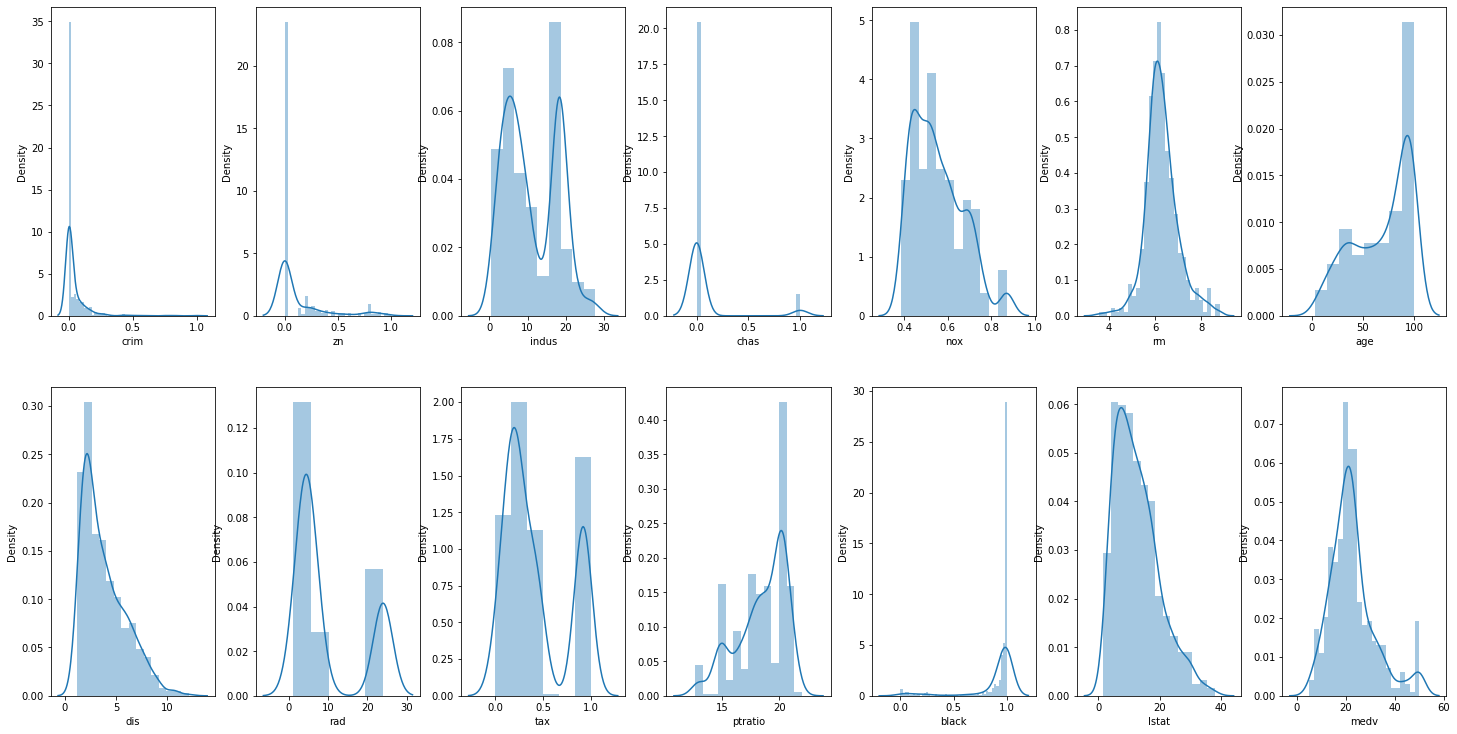

In [8]:
# lets start with Normalization
cols = ['crim', 'zn', 'tax', 'black']

def normalize_columns(cols, df):
    for col in cols:
        maximum = max(df[col])
        minimum = min(df[col])
        df[col] = (df[col]- minimum) / (maximum-minimum)
    return df 

normalized_df = normalize_columns(cols, raw_df)
create_dist_plots(normalized_df)

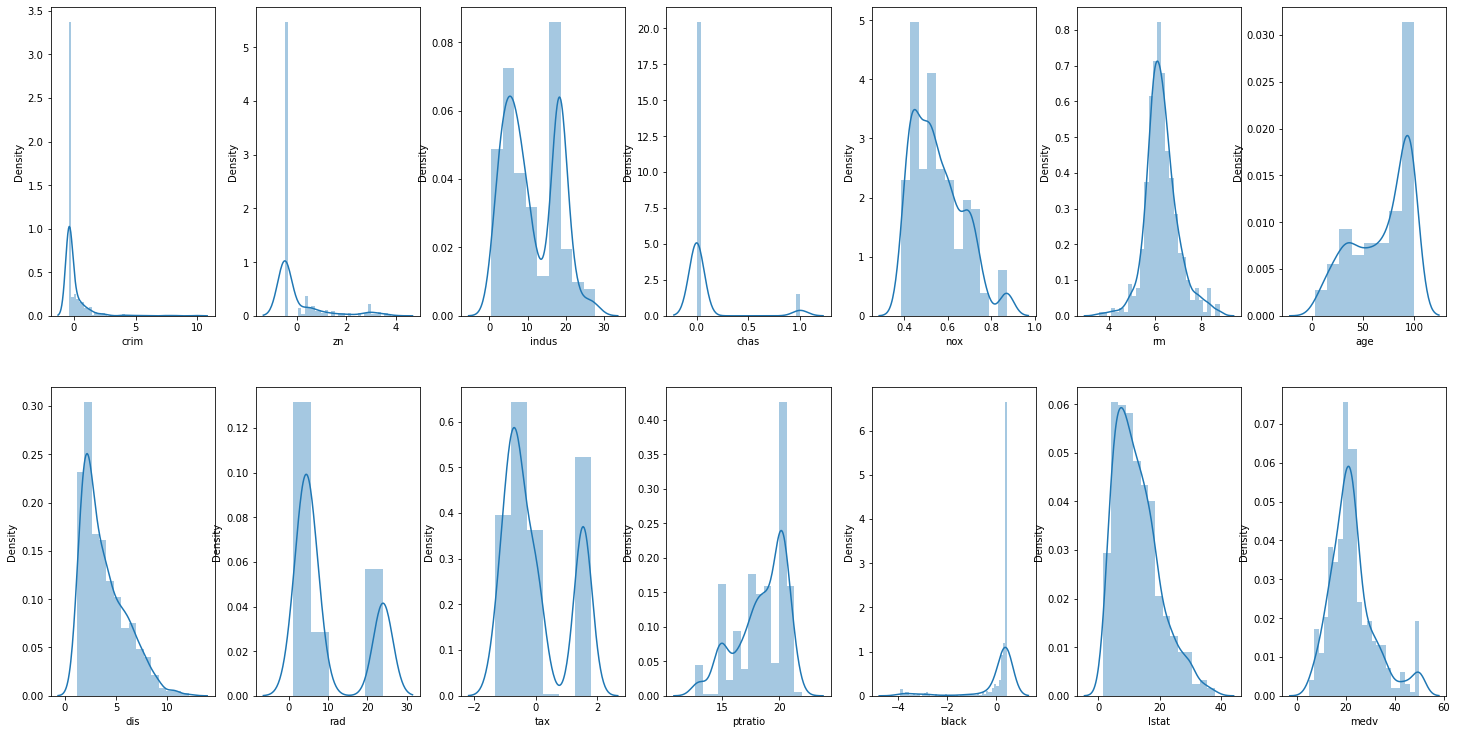

In [9]:
# now lets standarize
scaler = StandardScaler()
std_columns = scaler.fit_transform(normalized_df[cols])
std_df = pd.DataFrame(std_columns, columns=cols)

# Now lets substitue the columns
for col in cols:
    normalized_df[col]=std_df[col]

#finally change the name
processed_df = normalized_df

# plot the new distributions: not much difference but it will improve the model
create_dist_plots(processed_df)

## Correlation analysis

In [10]:
# Correlation matrix
corr_matrix = processed_df.corr()
# check the most correlated features
corr_matrix["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

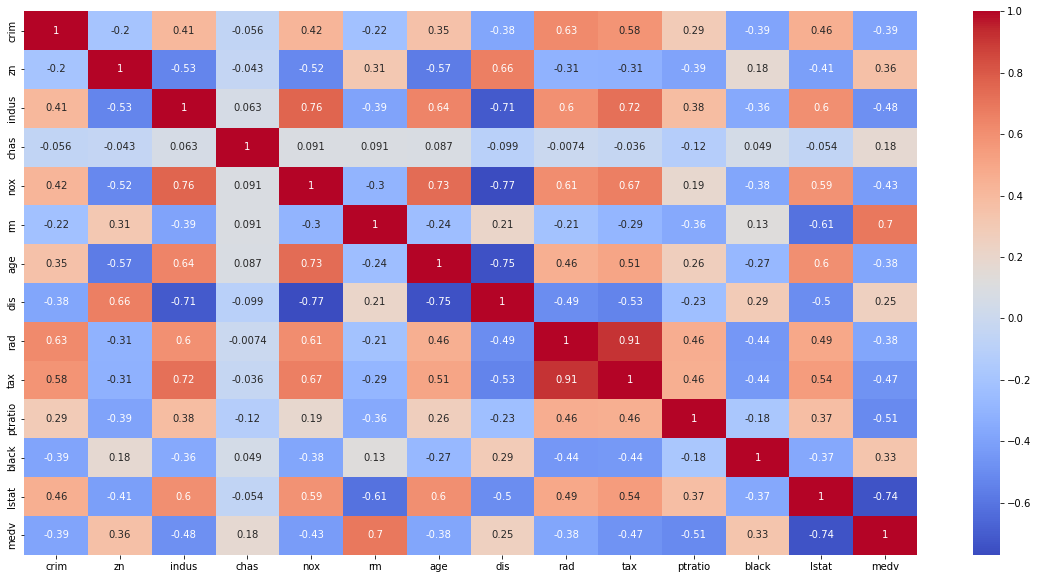

In [11]:
# Create some heatmaps
def create_corr_heat_map(df):
    plt.figure(figsize=(20,10))
    corr = df.corr()
    sns.heatmap(corr, annot=True,cmap='coolwarm')

def create_corr_dist_map(df):
    plt.figure(figsize=(20,10))
    attributes = df.columns.values
    scatter_matrix(df[attributes], figsize=(12, 10))

create_corr_heat_map(processed_df)

<Figure size 1440x720 with 0 Axes>

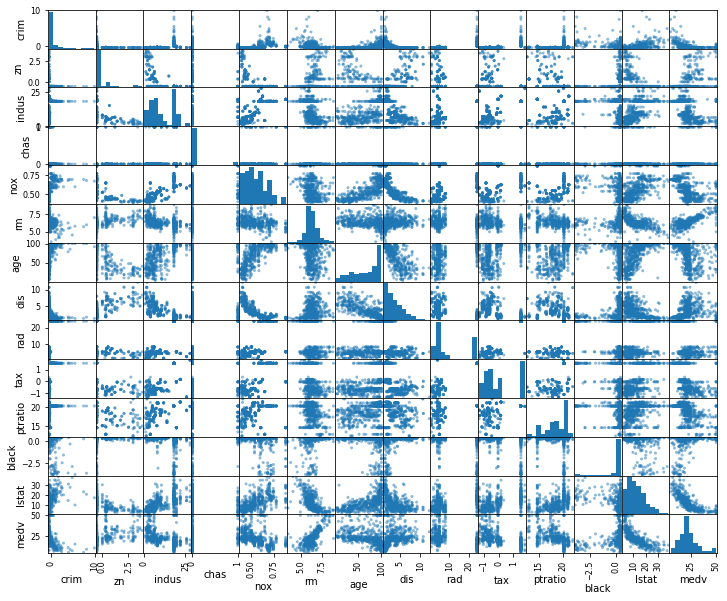

In [12]:
create_corr_dist_map(processed_df)

<AxesSubplot:xlabel='rm', ylabel='medv'>

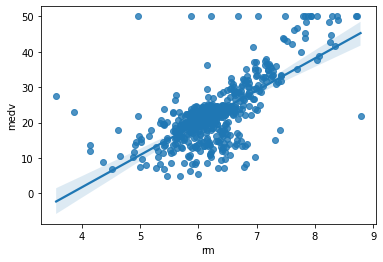

In [13]:
# At this point we have identified lstat and rm as being highly correlated corr>abs(0.5)
# Lets issolate this to appreciate them better

# Positively correlated
sns.regplot(y=processed_df.medv, x = processed_df.rm)

<AxesSubplot:xlabel='lstat', ylabel='medv'>

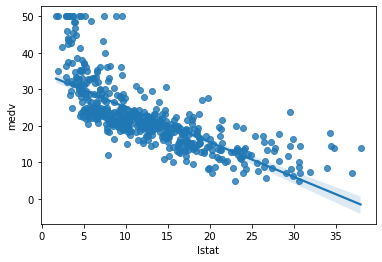

In [14]:
# Negatively correlated
sns.regplot(y=processed_df.medv, x = processed_df.lstat)

<AxesSubplot:xlabel='rad', ylabel='medv'>

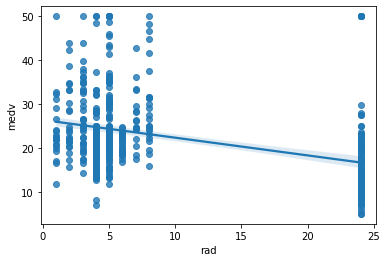

In [15]:
# We also notice how there the column 'rad' shows almost a completely vertical line
# It wouldn help much to keep it.
sns.regplot(y=processed_df.medv, x = processed_df.rad)

## Training
#### We have arrive to the traning, lets create our X and y frames to beggin with the process

In [16]:
X = processed_df.drop(columns=['medv', 'rad'], axis=1)
y = processed_df['medv']

In [17]:
# Split into training and testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

Training Summary:
-- MSE from predictions  = 22.673428576790837
-- MSE from cross_val = 25.425813853706906 -> [-21.20941713 -15.62583648 -37.26102432 -20.29119006 -32.74160128]
-- Score from cross_val =  0.6642149464447675 -> [0.71675279 0.71593779 0.43239373 0.74463943 0.71135099]
Coefficients
Scores Learning Curve


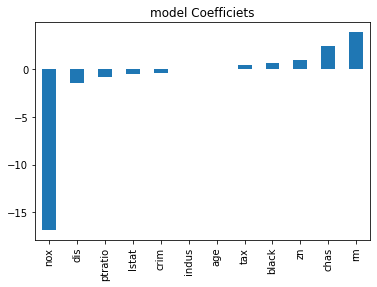

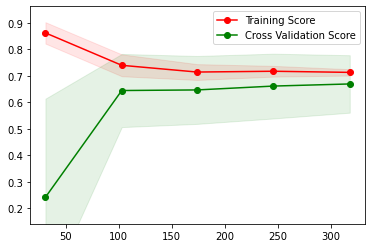

In [43]:
def plot_learning_curve_score(X,y, model):    
    # Plot the Learning Curve with Scores in Y axe
    # Use X, cross validation will take care of splitting the data
    cv = KFold(10, shuffle=True)
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                                            X=X,
                                                                            y=y,
                                                                            cv=cv,
                                                                            shuffle = True, 
                                                                            random_state = 45)
    #plot_learning_curve(train_sizes, train_scores, test_scores)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    #plot
    ax.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha = 0.1,
                     color='r')
    ax.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha = 0.1,
                     color='g');
    ax.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training Score")
    ax.plot(train_sizes, test_scores_mean, "o-", color='g', label="Cross Validation Score")   
    ax.legend()
    plt.ylim(max(-3, test_scores_mean.min()-.1), train_scores_mean.max()+0.1)
    


# Training function
def train_linear_reg(model, X, y):    
    # Train the model
    model.fit(X, y)
    # Make some predictions 
    y_pred = model.predict(X)
    # Get cross_val score
    cv_score_default = cross_val_score(model, X, y, cv=5)
    # Get cross_val Error
    cv_score_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
    # Report
    print("Training Summary:")
    print(f'-- MSE from predictions  = {mean_squared_error(y,y_pred)}')
    print(f'-- MSE from cross_val = {np.abs(np.mean(cv_score_mse))} -> {cv_score_mse}')
    print(f'-- Score from cross_val =  {np.mean(cv_score_default)} -> {cv_score_default}')
    print("Coefficients")
    coef_df = pd.Series(model.coef_, X.columns).sort_values()
    coef_df.plot(kind="bar", title="model Coefficiets")
    print(f'Scores Learning Curve')
    plot_learning_curve_score(X,y, model)
    

linear_regression = LinearRegression()
train_linear_reg(linear_regression, X_train, y_train)




Training Summary:
--test data MSE = 28.296076593707355
--cross_val MSE = 31.000365319990657 -> [-31.28070134 -18.30602545 -37.22289693 -19.10664943 -49.08555345]
--cross_val Default Score =  0.6018503838963543 -> [0.58225296 0.66721462 0.43297453 0.75954664 0.56726318]
Coefficients
Scores Learning Curve
----------------sfasd


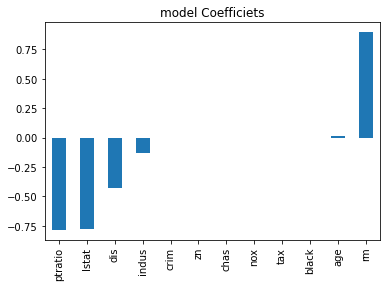

In [19]:
lasso = Lasso()
train_linear_reg(lasso, X_train, y_train)

Training Summary:
--test data MSE = 22.874726978623816
--cross_val MSE = 25.675067803746238 -> [-20.44083528 -16.41420818 -38.48578948 -19.27218049 -33.76232559]
--cross_val Default Score =  0.660435074303586 -> [0.72701704 0.70160598 0.41373658 0.75746346 0.70235231]
Coefficients
Scores Learning Curve


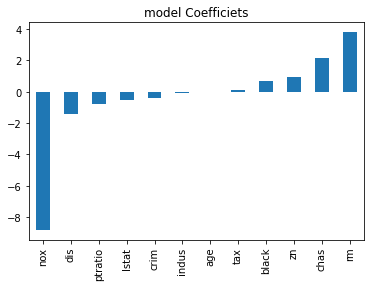

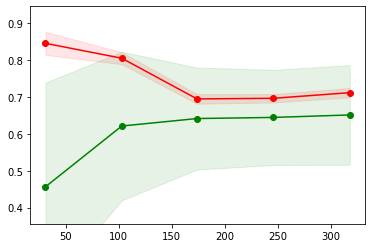

In [39]:
ridge = Ridge(alpha=1)
train_linear_reg(ridge, X_train, y_train)